# Image converter

This is the sample project to use `tornado_instant_webapi`.

Firstly, run `image_convert_server.py` like this:
```bash
pip install git+https://github.com/Hiroshiba/tornado_instant_webapi
pip install requests
pip install Pillow  # image library
python image_convert_server.py
```

Then, you can request.

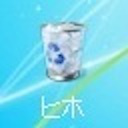

In [1]:
from io import BytesIO
from PIL import Image
import requests
url = 'http://localhost:8000/'
Image.open(open('sample.jpg', 'rb'))

In `image_converter/image_converter.py`, the some static methods are writtern.

```py
class ImageConverter(object):
    ...
    @staticmethod
    def convert(image: Image, mode: str = None, matrix=None, dither: int = None, palette: int = 0, colors: int = 256):
        return image.convert(mode, matrix, dither, palette, colors)
    ...
```

If you want to use `convert` method, you should post a query to `/convert`.

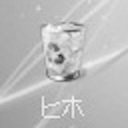

In [2]:
r = requests.post(url + 'convert', files=dict(image=open('sample.jpg', 'rb')), data=dict(mode='L'))
Image.open(BytesIO(r.content))

If you want to post the `list` or `dict` query, you can use JSON strings.

```py
    @staticmethod
    def resize(image: Image, size: tuple, resample: int = 0):
        return image.resize(size, resample)
```

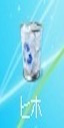

In [3]:
r = requests.post(url + 'resize', files=dict(image=open('sample.jpg', 'rb')), data=dict(size='[64, 128]'))
Image.open(BytesIO(r.content))

If you want to make new web API, you only add method with type hinting.

```py
    @staticmethod
    def effect_spread(image: Image, distance: int):
        return image.effect_spread(distance)
```

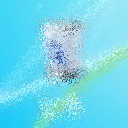

In [4]:
r = requests.post(url + 'effect_spread', files=dict(image=open('sample.jpg', 'rb')), data=dict(distance=10))
Image.open(BytesIO(r.content))

Thanks!